# <center> Лабораторная работа 2 </center>
### <center> Титов Вадим, 676 группа </center>

In [371]:
# Узнаем задания

from zlib import crc32
import numpy as np

if __name__=='__main__':
    mail = input('enter phystech e-mail\n') 
    to_hash =  mail.strip().split('@')[0]    
    h = crc32(to_hash.encode('utf-8')) + 127
    seed = h%(2**32-1)
    rs = np.random.RandomState(seed)
    task1 = rs.randint(low=1, high=5)
    task2 = rs.randint(low=1, high=5)
    print ('Your tasks are 1.{}, 2.{}'.format(task1, task2))

enter phystech e-mail
titov.vn@phystech.edu
Your tasks are 1.3, 2.1


### Задание 1.3

В прикрепленном pdf файле указана четкая постановка задачи

In [372]:
import os
import imageio
import matplotlib.pyplot as plt
import numpy as np

In [373]:
path_images = 'images_full/images/'
modified = sorted(list(filter(lambda s: s.startswith('modified'), os.listdir(path_images))))
original = sorted(list(filter(lambda s: s.startswith('original'), os.listdir(path_images))))

In [375]:
original[slice(0, 3)]

['original_100136192.bmp', 'original_100351981.bmp', 'original_100620761.bmp']

In [376]:
modified[slice(0, 3)]

['modified_100136192_case.bmp',
 'modified_100351981_point.bmp',
 'modified_100620761_woman.bmp']

In [325]:
def get_imgs(idx):
    im0 = imageio.imread(os.path.join(path_images, original[idx]))
    im1 = imageio.imread(os.path.join(path_images, modified[idx]))
    return np.asarray(im0, dtype=np.int16), np.asarray(im1, dtype=np.int16)

def plot_images(im0, im1):
    w = 10
    h = 10
    fig = plt.figure(figsize=(8, 8))
    columns = 2
    rows = 1
    fig.add_subplot(rows, columns, 1)
    plt.imshow(im0)
    fig.add_subplot(rows, columns, 2)
    plt.imshow(im1)    
    plt.show()

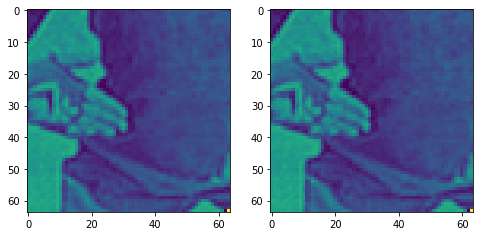

In [377]:
plot_images(*get_imgs(5))

### Постановка задачи:

Изложено в .pdf

In [413]:
from scipy.stats import ttest_1samp
from permute.core import one_sample

In [378]:
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.multitest import multipletests

In [431]:
from scipy.stats import wilcoxon

In [381]:
# генерация данных

data = []
for i in range(len(original)):
    im0, im1 = get_imgs(i)
    diff_data = (im1.flatten() - im0.flatten())
    data.append(diff_data)

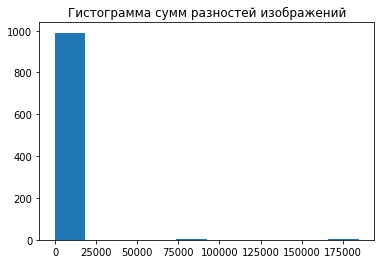

In [501]:
plt.hist(list(map(lambda row: sum(row), data)));
plt.title('Гистограмма сумм разностей изображений')

plt.show();

Уже видно, что большая часть выборки имеет среднее около 0.

In [433]:
alpha = 0.05

idxs = []
p_vals = []
for i in range(len(data)):
    st, p_val = wilcoxon(data[i])
    if (p_val < alpha):
        idxs.append(i)
    p_vals.append(p_val)

In [445]:
multipletests?

In [449]:
rejections = multipletests(p_vals, method='holm')

In [450]:
idxs = np.where(rejections[0])

In [451]:
idxs[0]

array([ 50,  89,  93, 494, 512, 561, 810, 832, 846, 897])

In [452]:
seqs = []
for i in idxs[0]:
    im0, im1 = get_imgs(i)
    seq = im1.flatten() - im0.flatten()
    seqs.append(seq)

new_chr_number = old(not Ascii) + $\alpha$ * $id$

$\Rightarrow$

difference = $\alpha$ * id

Так как в закодированных данных тоже присутствует шум, будем искать в найденных изображениях слова из теста, чтобы найти alpha.

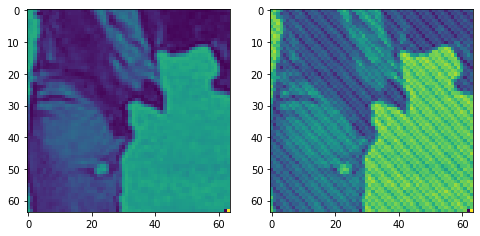

In [455]:
plot_images(*get_imgs(50))

In [456]:
def decode_int(el, alpha):  
    return chr(el//alpha + ord('a'))

In [467]:
good_alphas = set()
for alpha in range(1, 10):
    
    sentences = []
    for seq in seqs:
        sent = []
        for el in seq:
            sent.append(decode_int(el, alpha))
        sentences.append(sent)

    for idx, snt in zip(idxs[0], sentences):
        check_str = ''.join(snt)
        encoded_str = modified[idx].rsplit('.')[0].split('_')[-1]
        if (encoded_str in check_str):
            good_alphas.add(alpha)

In [468]:
good_alphas

{3}

Единственно верным вариантом оказалось $\alpha = 3$, дополнительных тестирований делать не будем. Теперь попробуем расшифровать тестовую пару.

In [471]:
best_a = 3

In [469]:
test_original = 'images_full/original_test.bmp'
test_modified = 'images_full/modified_test.bmp'

In [470]:
im_o = imageio.imread(test_original)
im_m = imageio.imread(test_modified)
im_o = np.asarray(im_o, dtype=np.int16)
im_m = np.asarray(im_m, dtype=np.int16)

In [472]:
diff = im_m.flatten() - im_o.flatten()

In [474]:
chars = []
for el in diff:
    chars.append(decode_int(el, best_a))

In [493]:
decoded_sequence = ''.join(chars)

In [494]:
decoded_sequence

'xheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemoneuleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonexleboxskixheresuhemonezleboxskirheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhemonezleboxskixheresuhe

In [495]:
# Уже видим, что повторяется вот такая последовательность

len('xheresuhemonezleboxski')

22

In [492]:
[final_rez[22*i:22*(i+1)] for i in range(20)]

['xheresuhemonezleboxski',
 'xheresuhemonezleboxski',
 'xheresuhemonezleboxski',
 'xheresuhemonezleboxski',
 'xheresuhemonezleboxski',
 'xheresuhemonezleboxski',
 'xheresuhemonezleboxski',
 'xheresuhemonezleboxski',
 'xheresuhemonezleboxski',
 'xheresuhemonezleboxski',
 'xheresuhemonezleboxski',
 'xheresuhemonezleboxski',
 'xheresuhemonezleboxski',
 'xheresuhemonezleboxski',
 'xheresuhemonezleboxski',
 'xheresuhemonezleboxski',
 'xheresuhemonezleboxski',
 'xheresuhemonezleboxski',
 'xheresuhemonezleboxski',
 'xheresuhemonezleboxski']

Видим, что в данной паре шум не присутствует и четко видна повторяемость фразы, таким образом,
###   Ответ: xheresuhemonezleboxski